<p style="text-align: center;">
<font size="6"> 
Deterministic Chaos 
</font>
<br/><br/>
Dannie Wright
</p>

## Table Of Contents <a id='TableOfContents'></a>

### [Introduction](#intro)

### [Model](#mod)

### [Numerical Method](#num)

### [Results](#res)
    
   * [Pendulum](#pendulum)
    
   * [Lorenz](#lorenz)

### [Analysis](#an)

### [Summary](#sum)

### [References](#refs)


## Introduction <a id='intro'></a>

Many simple systems of differential equations exhibit deterministic chaos. In this project, I solved two such systems, driven damped nonlinear pendulum, and the Lorenz equations, in order to study chaotic phenomena. Chaos is defined by the divergenze of results at long times when the initial conditions are nearly the same [2,3].

Damped driven pendulum models with small ratios of the driving force to the frictional force oscillate in a predictable manner [2]. In a non-chaotic, or deterministic pendulum, the phase difference between two pendulums started with similar initial conditions (such as a small difference in initial amplitude and the same angular velocity) will converge to zero. When the ratio of the driving force to the frictional force is large, the pendulum exhibits unpredictable motion that is considered chaotic. The pendulum's motion is so dependent on the starting conditions that two pendulums started with nearly the same conditions fail to converge to the same phase.

The Lyapunov exponent is a measurement of a system's sensitivity is to changes in initial conditions [5]. The Lyapunov exponent $\lambda$ is measured by fitting data representing the phase difference versus the controlling parameter with a function of the form $exp (\lambda t - \alpha)$ [3,5]. $\lambda$ is positive for nonchaotic systems and negative for chaotic ones [3,5]. 

The chaotic nature of the system of equations known as the Lorenz equations was discovered in the 1960s by Edward Lorenz when he used intermediate values from one simulation as the starting conditions for another [3]. The difference between the two simulations ended up "as big as the signal itself", according to Lorenz, due to a small rounding in the new starting values [3].

The Lorenz equations (shown below) arise from models that describe the flow of a fluid in a two-dimensional system [3,4]. Lorenz simplified the original system he was working with (one of the Rayleigh's convection equations) by noticing that all except three variables tended towards zero [3]. The equations model a complicated system with only three variables, so there is little meaning behind the variable's specific values [3].



## Model <a id='mod'></a>

#### Damped Driven Nonlinear Pendulum


The equation of motion for a for a damped driven nonlinear pendulum can be derived from Newton's laws as

\begin{equation*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin(\theta) - \alpha_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t), \tag{Equ. 1}
\end{equation*}

where $g$ is the gravitational acceleration, $l$ is the length of the pendulum arm, $\theta$ is the angle of displacement from the vertical, $\alpha_f$ is a coefficient for the damping force, $F_d$ is a coefficient for the driving force, and $t$ is time. Note that the units for $\alpha_f$ is 1/s and $F_d$ is radians/sec$^2$, these are not force values.

To illustrate chaotic and non chaotic systems, four pendulums were simulated with two having $F_d = 0.5 N/kg$ and two with $F_d = 1.2 N/kg$, but the initial angle varied by 0.001 radian for similar $F_d$ values. For most of the simulations I applied the following parameters: $g = 9.8 m/s^2$, $l = 9.8 m$, $\alpha_f = 0.5$, and $\omega_d = 2 / 3 rads/sec$, with a starting angle of 0.2 rads, and no initial angular velocity. $F_d = 0.5 N/kg$ results in an unchaotic solution while $F_d = 1.2 N/kg$ is chaotic. $F_d = 0 N/kg$ was also used to show another nonchaotic solution to the pendulum's equation of motion. These values are based on Giordano's solution [2].



#### Lorenz Equations
The Lorenz equations are meant to model an over simplified two-dimensional weather system with the three independent variables x, y, and z. The variables $\sigma$, $\rho$, and $\beta$ are parameters for the system. The set of differential equations is given by

\begin{equation*}
\frac{dx}{dt} = \sigma (y - x)
\end{equation*}
\begin{equation*}
\frac{dy}{dt} = x (\rho - z) - y  \tag{Equ. 2}
\end{equation*}
\begin{equation*}
\frac{dz}{dt} = xy - \beta z.
\end{equation*}

In the cases I modeled, the solutions for x, y, and z in the Lorenz equations oscillate around the points at 

\begin{equation*}
\big ( \sqrt{\beta (\rho - 1)}, \sqrt{\beta (\rho - 1)}, \rho - 1 \big )
\end{equation*}

\begin{align}
and
\end{align}

\begin{equation*}
\big ( -\sqrt{\beta (\rho - 1)}, -\sqrt{\beta (\rho - 1)}, \rho - 1 \big ). 
\end{equation*}

These are known as critical points because x, y, and z oscillate around these points. When 

\begin{equation*}
\rho > \frac{\sigma (\sigma + \beta + 3)}{\sigma - \beta - 1} \tag{Equ. 3}
\end{equation*}

the system becomes chaotic, and the two points critical points mentioned become known as Lorenz Attractors [4] because the critical points are strange-attractors. An attractor is a point that a dynamic system evolves towards 
[2,5,7]. A strange-attractor is an attractor with a fractal structure [2], where a fractal is a "geometric object that is self-similiar on all scales" [5]. Strange-attractors are typically, but not always, attractors of a chaotic system [5].

To model a chaotic system I used the parameters $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$, because these were Lorenz's original parameters. To model non chaotic systems I used $\rho = 20$, $22$, $24$, $24.05$, $24.075$, and $25$, with the same $\sigma$ and $\beta$ values. 

## Numerical Method <a id='num'></a>

The Runge-Kutta method is a numerical technique to solving ordinary differential equations [1]. The method is based on using the Taylor series expansion of a function to approximate the value of that function at a later time [1]. Given the value of the function $\theta(t)$ is known at a time $t$, then after a small amount of time $h$ the new value of $\theta(t)$ is

\begin{equation*}
\theta(t + h) = \theta(t) + h \frac{d\theta}{dt} + \tfrac{1}{2} h^2 \frac{d^2\theta}{dt^2} + \dots 
\end{equation*}
\begin{equation*}
 = \theta(t) + h f(\theta, t) + O(h^2),
\end{equation*}

where $\frac{d\theta}{dt} = f(\theta, t)$ and $O(h^2)$ is used to represent all the terms $h^2$ or higher in the expansion [1]. This approximation is the first-order Runge-Kutta method, Euler's method [1]. 

Since higher order forms the the Runge-Kutta method use more terms from the Taylor series expansion, higher orders allow for greater accuracy for the same choice of $h$ [1]. The common fourth order is given by

\begin{equation*}
\theta(t + h) = \theta(t) + \tfrac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{equation*}

where 

\begin{equation*}
k_1 = h f \big (\theta, t \big ), 
\end{equation*}
\begin{equation*}
k_2 = h f \big (\theta + \tfrac{1}{2} k_1, t + \tfrac{1}{2}h \big ), 
\end{equation*}
\begin{equation*}
k_3 = h f \big (\theta + \tfrac{1}{2} k_2, t + \tfrac{1}{2}h \big ),
\end{equation*}
\begin{equation*}
k_4 = h f \big (\theta + k_3, t + h \big ).
\end{equation*}

This method works with a system of equations by replacing $\theta$ with $\vec{r} = \big (\theta, \omega, \dots \big )$ and $\vec{f} \big (\vec{r}, t \big ) =  \big (f_\theta \big (\vec{r}, t \big ), f_\omega \big (\vec{r}, t \big ), \dots \big )$ where $\frac{d\theta}{dt} = f_\theta \big (\theta, \omega, \dots, t \big )$ [1]. This results in the equations I used in this project

\begin{equation*}
\vec{k_1} = h \vec{f} \big (\vec{r}, t \big ), 
\end{equation*}
\begin{equation*}
\vec{k_2} = h \vec{f} \big (\vec{r} + \tfrac{1}{2} \vec{k_1}, t + \tfrac{1}{2}h \big ), 
\end{equation*}
\begin{equation*}
\vec{k_3} = h \vec{f} \big (\vec{r} + \tfrac{1}{2} \vec{k_2}, t + \tfrac{1}{2}h \big ), 
\end{equation*}
\begin{equation*}
\vec{k_4} = h \vec{f} \big (\vec{r} + \vec{k_3}, t + h \big ), 
\end{equation*}
\begin{equation*}
\vec{r} \big (t + h \big ) = \vec{r} \big (t \big ) + \tfrac{1}{6} \big (\vec{k_1} + 2\vec{k_2} + 2\vec{k_3} + \vec{k_4} \big ).
\end{equation*}

This method is accurate to terms of order $h^4$ and has an error that is of the order $h^5$ [1].



## Results <a id='res'></a>


In [1]:
import numpy as np
import pylab as plt
import lorenz as lz
from RungeKutta import vectorRungeKutta as rk
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import argrelextrema
import doctest
%matplotlib inline

In [14]:
def nonlinearPendulum (r, t, g, l, alpha_f, F_d, omega_d):
    """
    Description:calculates the values of the differential equations 
                that describe the damped driven nonlinear pendulum
    
    Parameters: r - touple (omega, theta) both are floats
                t - float, time of evaluations
                g - float, gravitational acceleration
                l - float, length of pendulum
                alpha_f - float, frictional factor
                F_d - float, driving factor
                omega_d - float, frequency of driving force
    
    Returned: 1 x 2 numpy array of floats [fomega, ftheta]
    
    Usage:
    >>> nonlinearPendulum ((0.0, 0.2), 0, 9.8, 9.8, 0.5, 0.5, 2 / 3)
    array([-0.19866933,  0.        ])
    """
    omega, theta = r
    
    fomega = -g / l * np.sin (theta) - alpha_f * omega + F_d * np.sin (omega_d * t)
    ftheta = omega
    
    return np.array ([fomega, ftheta], float)


def oscillatorDomain (solution):
    """
    Description: adjusts all theta and omega values of the solution to be
                 between -pi and pi
    
    Parameters:solution - m x 3 array [time, omega, theta], all floats 
    
    Returned:m x 3 arrary where all omega and theta values are between
             -pi and pi
    
    Usage:
    >>> solution = np.array([[0.0, 2.8, 2.9],\
                            [1.0, 3.14, 3.10],\
                            [2.0, 4.5, 4.6],])
    >>> oscillatorDomain (solution)
    array([[ 0.        ,  2.8       ,  2.9       ],
           [ 1.        ,  3.14      ,  3.1       ],
           [ 2.        , -1.78318531, -1.68318531]])
    """
    for n in range (len (solution[:,0])):
        theta = solution[n,2]
        omega = solution[n,1]

        while np.pi < solution[n,2]:
            solution[n,2] -= 2 * np.pi

        while solution[n,2] < -np.pi: 
            solution[n,2] += 2 * np.pi

        while np.pi < solution[n,1]:
            solution[n,1] -= 2 * np.pi

        while solution[n,1] < -np.pi: 
            solution[n,1] += 2 * np.pi
            
    return solution


def lyapunov (xValues, yValues):
        """
        Description: calculates exponential fit constants to oscillatory
                        data
        
        Parameters: xValues - independant values, array of floats
                    yValues - dependant values, array of floats
        
        Returned: tuple, both floats
        """
        
        #calculate maximums for yvalues, returns index values
        maximums = argrelextrema(yValues, np.greater)

        #determine fit values to maximums
        lyaX = xValues[maximums]
        lyaY = yValues[maximums]
        lamd, alpha = np.polyfit(lyaX, np.log(abs(lyaY)), 1)
        
        return (lamd, alpha)


    
    
doctest.testmod()

TestResults(failed=0, attempted=3)


### Nonlinear Damped Driven Pendulum  <a id='pendulum'></a>


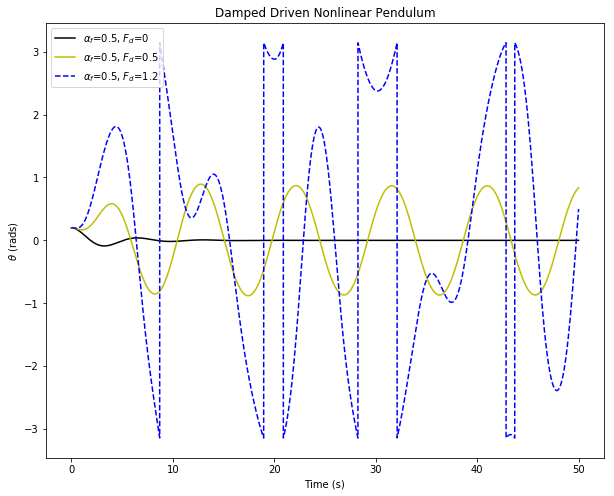

In [3]:
if "__main__" == __name__:

    styles = ["-k", "-y", "--b", "--g"]
    
    #set Runge-Kutta argument values
    a = 0 #s
    b = 50 #s
    interval = (a, b)
    steps = 10000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = [0.5] #N/kg s
    F_d = [0, 0.5, 1.2] #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum")
    
    #initialize style count to zero
    count = 0
    
    #plot each figure
    for i in range (len (alpha_f)):
        for j in range (len (F_d)):
            
            #solve for the oscillator values
            solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, 
                           l, alpha_f[i], F_d[j], omega_d, order = 4)
            
            #ensure solution values are between -pi and pi
            solution = oscillatorDomain (solution)
            
            #plot the current solution
            ax.plot (solution[:,0], solution[:,2], styles[count], label = r"$\alpha_f$={}, "
                     "$F_d$={}".format (alpha_f[i], F_d[j]))
            
            #increment count for the graph style
            count += 1
            
    plt.legend()
    plt.show()

**Figure 1**

*
This figure shows the angle of displacement for a damped driven nonlinear pendulum with a friction coefficient of 0.5 N/kg. The $\theta$-axis shows the angle of displacement, the range is from -4 to 4 radians. The time-axis shows the time elapsed and ranges from 0 to 60 seconds. The solid-black line represents a driving coefficient of $F_d$ = 0, the solid-yellow $F_d$ = 0.5, and the dashed-blue line $F_d$ = 1.2 N/kg. $F_d = 0$ N/kg the magnitude of $\theta$ decays rapidly. $F_d = 0.5$ N/kg oscillates with a magnitude of approximately 1 radian. $F_d = 1.2$ N/kg oscillates from $-\pi$ to $\pi$ without periodicity. The graph has points that appear discontinuous due to a remapping of the angle-value. Since any angle $\theta$ is equivalent to $\theta \pm 2\pi$, I mapped this graph to keep $\theta$ within the range of $-\pi$ to $\pi$, as is customary [2]. 
*



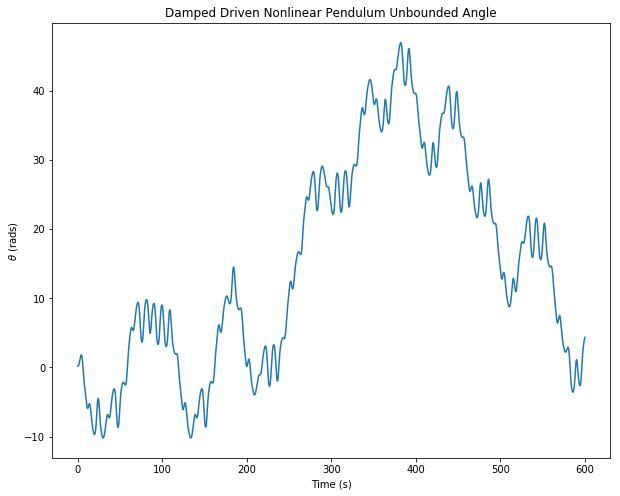

In [5]:
if "__main__" == __name__:
  
    #set Runge-Kutta argument values
    a = 0 #s
    b = 600 #s
    interval = (a, b)
    steps = 1000000
    order = 4
    numIndepVars = 2
    breaks = 5
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = 0.5 #N/kg s
    F_d = 1.2 #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum Unbounded Angle")
    
    #initialize style count to zero
    count = 0
    
    #solve for the oscillator values
    solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, 
                   l, alpha_f, F_d, omega_d, order = 4, breaks = breaks)

    #plot the current solution
    ax.plot (solution[:,0], solution[:,2])
            
    plt.show()

**Figure 2**

*
This figure shows a pendulum's angle where the angle is not remapped. The time-axis ranges from 0 to 600 seconds and the $\theta$-axis ranges from -30 to 20 radians. The angle changes rapidly from increasing to decreasing with no pattern to the motion.
*

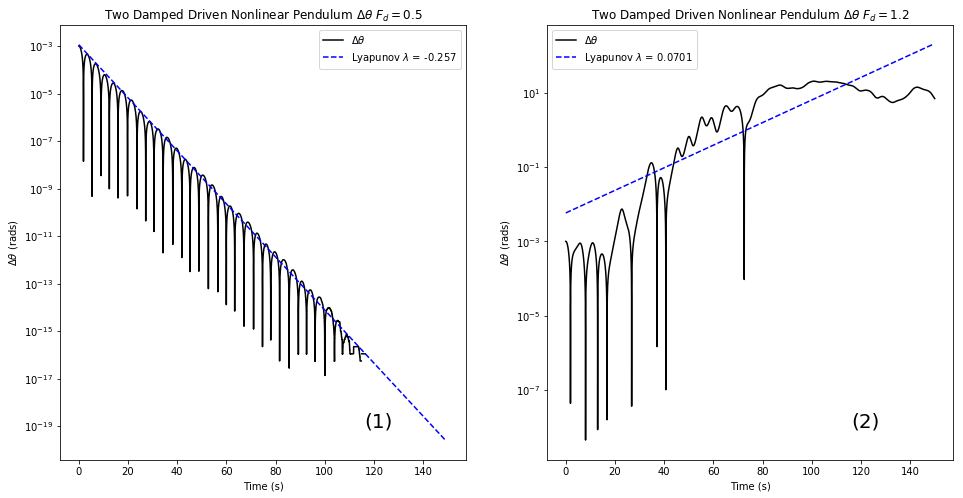

In [41]:
if "__main__" == __name__:
    #establish initial plot values
    plotLabelXPos = 0.75
    plotLabelYPos = 0.075
    plotLabelFontSize = 20

    #set Runge-Kutta argument values
    a = 0
    b = 150
    interval = (a, b)
    steps = 1000000
    order = 4
    numIndepVars = 2
    breaks = 5
    
    #set initial pendulum values
    g = 9.8 #m/s^2
    l = 9.8 #m
    alpha_f = 0.5 #N/kg s
    F_d = [0.5, 1.2] #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)

    #set intial Lyapunov exponent domain
    xValues = np.arange (a, b)
    
    plt.figure(figsize=(16, 8))
        
    for i in range (len (F_d)):
        
        #solve pendulum values for starting conditions differing by only 0.001 radians
        solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, l, alpha_f, F_d[i], omega_d, 
                       order = 4, breaks = breaks)
        
        #add 0.001 radian starting difference and calculate new data points
        r0 = (r0[0], r0[1] + 0.001)
        solution2 = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, l, alpha_f, F_d[i], omega_d,
                        order = 4, breaks = breaks)

        #create set with the solution's differences
        diff = solution2 - solution
              
        #set up plot
        ax = plt.subplot(1, 2, i + 1)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel(r"$\Delta\theta$ (rads)")
        ax.set_title (r"Two Damped Driven Nonlinear Pendulum $\Delta\theta$ $F_d=${}".format (F_d[i]))
        ax.text (plotLabelXPos, plotLabelYPos, "(" + str (i + 1) + ")", fontsize=plotLabelFontSize, 
                 transform=ax.transAxes)
 
        #determine Lyapunov exponent
        lamd, alpha = lyapunov (solution[:,0], diff[:,2])
        
        #plot the difference in the pendulum's angles
        plt.semilogy(solution[:,0], abs(diff[:,2]), "-k", label = r"$\Delta\theta$")
        
        #plot Lyapunov exponent
        plt.semilogy (xValues, np.exp(lamd * xValues + alpha), "--b", 
                      label = r"Lyapunov $\lambda$ = {:.3}".format (lamd))
        
        plt.legend()
    
    plt.show ()

**Figure 3**

*
These plots show the difference in the angular position of two pendulums that start with an initial angular difference of $\theta = 0.001$ radians. Both plots are semilog plots, where the $\Delta\theta$-axis is log base 10. Subplot (1) is for the case of $F_d = 0.5$ N/kg. The $\Delta\theta$-axis ranges from $10^{-20}$ to $10^{-2}$ radians. The time-axis ranges from 0 to 160 seconds. The solid-black line is for $\Delta\theta$-value while the dashed-blue line is for an exponential decay function. The $\Delta\theta$ line has sharp dips in between small rounded peaks. The overall trend of the peaks is modeled by the exponential function $e^{-0.257t - 6.947}$. Subplot (2) is for the case $F_d = 1.2$ N/kg. The $\Delta\theta$-axis ranges from $10^{-7}$ to $10^{5}$ radians. The time-axis also ranges from 0 to 160 seconds. The solid-black line shows the $\Delta\theta$-value for the pendulums and the dashed-blue line shows an exponential function. The $\Delta\theta$ line, like the one in subplot (1), has sharp dips, but the overall trend is increasing. The overall trend is given by $e^{0.0701t - 5.144}$, shown with the dashed-blue line.
*


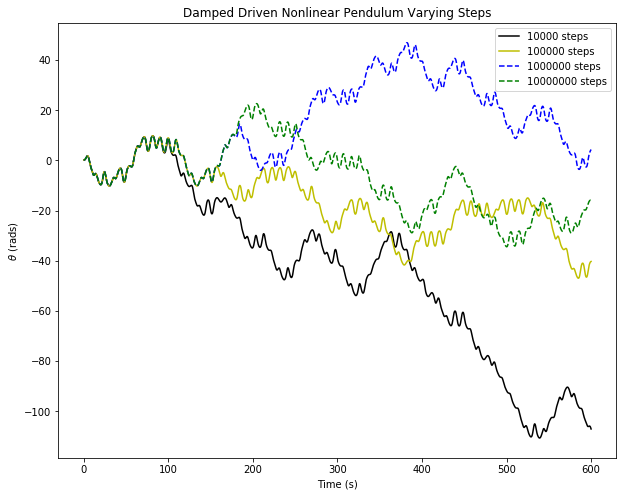

In [6]:
if "__main__" == __name__:

    styles = ["-k", "-y", "--b", "--g"]
    
    #set Runge-Kutta argument values
    a = 0 #s
    b = 600 #s
    interval = (a, b)
    steps = [10000, 100000, 1000000, 10000000]
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = 0.5 #N/kg s
    F_d = 1.2 #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum Varying Steps")
    
    #initialize style count to zero
    count = 0
    
    #plot each figure
    for i in range (len (steps)):

        #solve for the oscillator values
        solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps[i], g, 
                       l, alpha_f, F_d, omega_d, order = 4)

        #plot the current solution
        ax.plot (solution[:,0], solution[:,2], styles[count], label = "{} steps".format (steps[i]))

        #increment count for the graph style
        count += 1
            
    plt.legend()
    plt.show()

**Figure 4**

*
This figure shows how the motion of the pendulum changes based upon small variations caused by differing the number of steps. The time-axis ranges from 0 to 600 seconds. The $\theta$-axis ranges from -100 radians to 40 radians. The solid-black line is for 10,000 steps, the solid-yellow line 100,000 steps, the dashed-blue line 1,000,000 steps, and the dashed-green line 10,000,000 steps. All four pendulums change direction frequently and throughout the entire interval. All four pendulums overlap until just after 100 seconds. After 100 seconds the 10,000 step pendulum no longer overlaps with the others. The other three all overlap until about 175 seconds, where the 100,000 step pendulum diverges from the other two. The 1,000,000 and 10,000,000 step pendulums overlap until right around 190 seconds at which point they diverge from each other. After 190 seconds none of the lines share a similar pattern or very similar values for long.
*




### Lorenz Equations  <a id='lorenz'></a>


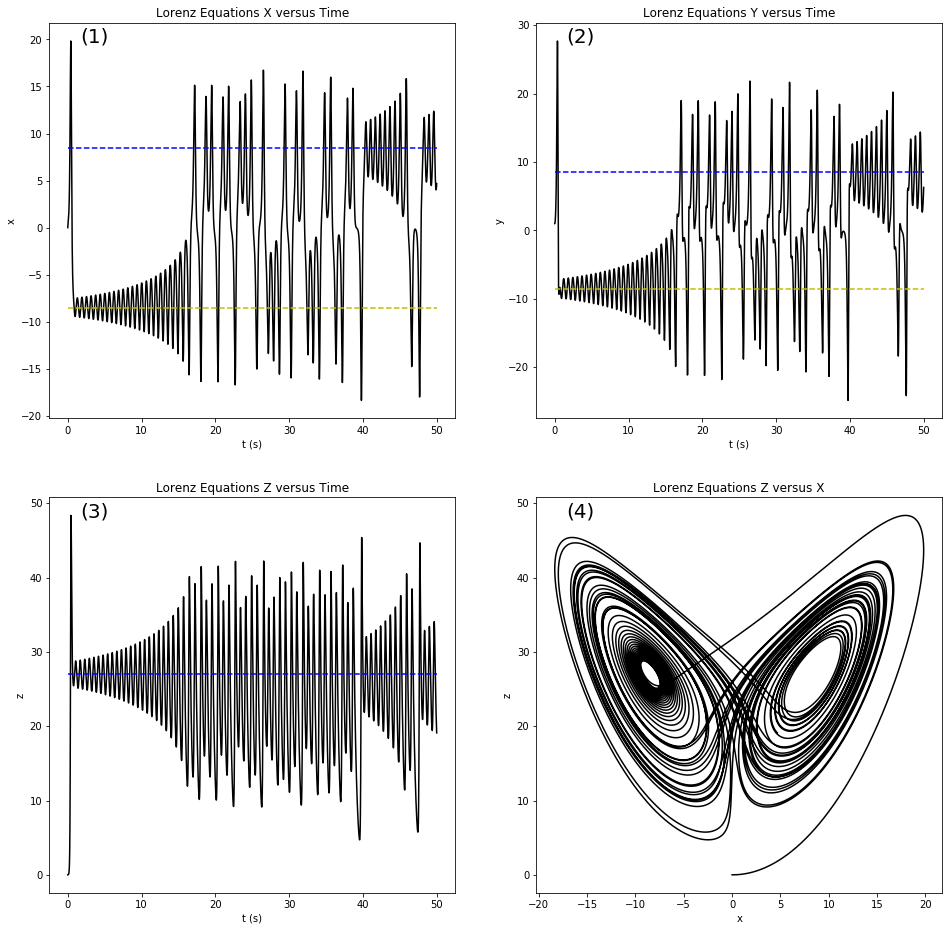

In [3]:
if __name__ == "__main__":   
    #set up plot
    plt.figure(figsize=(16, 16))
    
    #set constants and starting condition
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0.0, 1.0, 0.0)
    
    #set solution interval and accuracy
    interval = (0.0, 50.0)
    steps = 1000000
    
    #plot Lorenz solution
    lz.lorenzPlot (r0, state, interval, steps, bCrit = True)
    plt.show ()

**Figure 5**

*
This figure shows the solution to the Lorenz equations for the values $\sigma$ = 10, $\rho$ = 28, and $\beta$ = 8/3. The starting conditions were x = z = 0 and y = 1. There are four subplots to this figure. Subplots (1), (2), and (3) graph the values of x, y, and z, respectively, versus time. The time-axis for each of these ranges from 0 to 50 seconds. In subplot (1) the x-axis ranges from -20 to 20. In subplot (2) the y-axis ranges from -20 to 30. In subplot (3) the z-axis ranges from 0 to 50. In all three of these plots the graph oscillates rapidly for the first 15 seconds with an increasing amplitude over time. After around 15 seconds the plots take on different shapes from each other. The first and second plots appear similar due to there being an overlap in the position and shape of the major peaks and dips in both plots, but the regions between these larger extremas have varying amounts of smaller peaks and dips. The x-values in subplot (1) oscillate around x = 7.84 (dashed-blue line) and -7.84 (dashed-yellow line). The y-values in subplot (1) oscillate around y = 7.84 (dashed-blue line) and -7.84 (dashed-yellow line). The third plot oscillates around z = 27 (dashed-blue line). The fourth subplot shows z versus x. The x-axis ranges from -20 to 20 while the z-axis ranges from 0 to 50. In this graph there are two ring like shapes (known as attractors) on either side of the line x = 0. The line of the graph circles these attractors many times creating an almost butterfly looking shape.
*



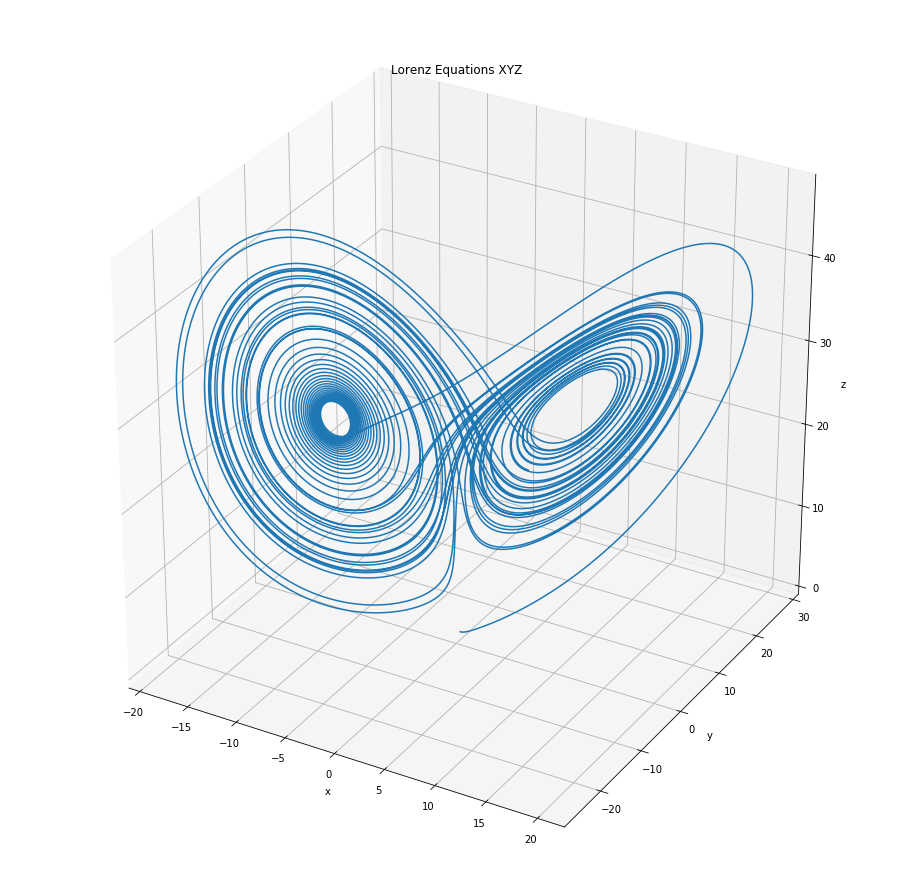

In [31]:
if __name__ == "__main__":
    #set constants and starting condition
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0.0, 1.0, 0.0)
    
    #set solution interval and accuracy
    interval = (0.0, 50.0)
    steps = 1000000
    
    #solve Lorenz equations
    solution = lz.lorenzSolution (r0, interval, steps, state)

    #plot the figure
    fig =  plt.figure(figsize=(16, 16))
    ax = fig.gca(projection='3d')
    ax.set_xlabel ("x")
    ax.set_ylabel ("y")
    ax.set_zlabel ("z")
    ax.set_title ("Lorenz Equations XYZ")
    ax.plot(solution[:,1], solution[:,2], solution[:,3])
    plt.show()

**Figure 6**

*
This figure shows the solution to the Lorenz equations for $\sigma$ = 10, $\rho$ = 28, and $\beta$ = 8/3, where x, y, and z are plotted against each other. The starting conditions were x = z = 0 and y = 1. The x-axis ranges from -20 to 20, the y-axis ranges from -20 to 30, and the z-axis ranges from 0 to 40. The line of the graph is shown in blue. There are two attractors in the figure that are made up of many circles that spiral around to fixed points. 
*


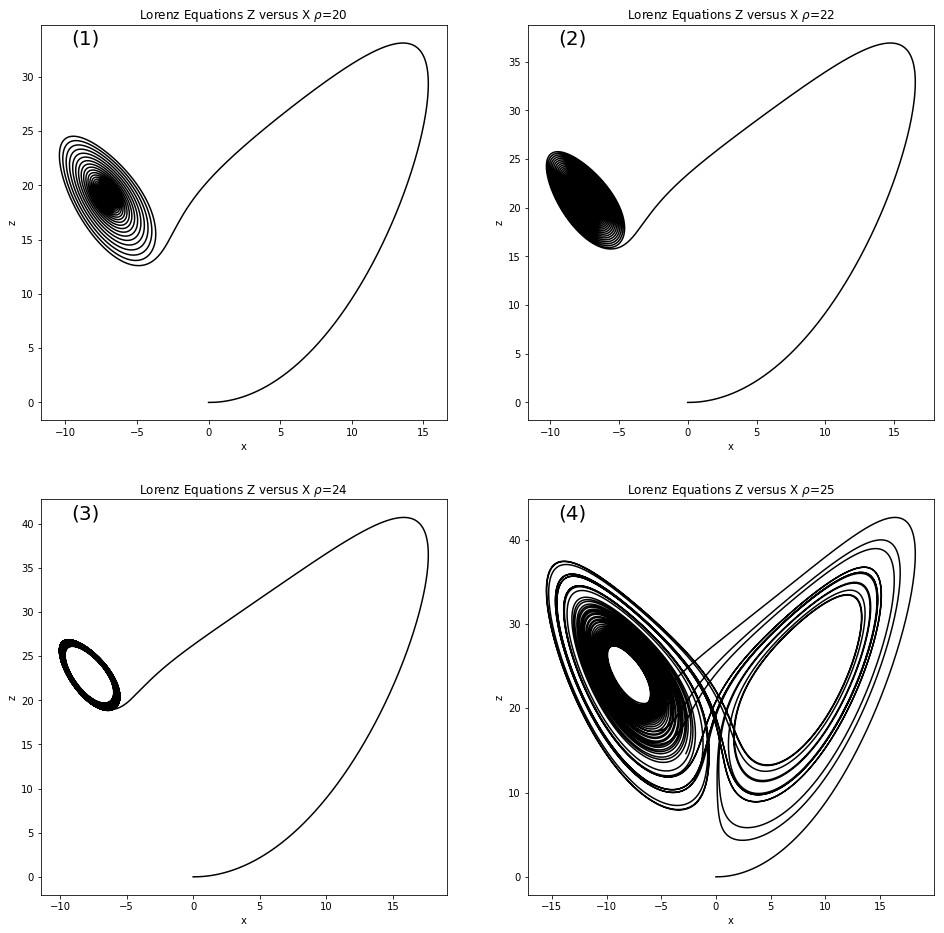

In [3]:
if __name__ == "__main__":
    #establish initial plot values
    plotLabelXPos = 0.075
    plotLabelYPos = 0.95
    plotLabelFontSize = 20
    
    #set constants and starting condition
    sigma = 10.0
    rho = [20, 22, 24, 25]
    beta = 8.0 / 3.0
    r0 = (0.0, 1.0, 0.0)
    
    #set solution interval and accuracy
    interval = (0.0, 50.0)
    steps = 100000
    
    #set up plot
    plt.figure(figsize=(16, 16))
    
    #plot the figure for each rho value
    for i in range (len (rho)):
        
        #set the state based on the current rho value
        state = (sigma, rho[i], beta)

        #solve the Lorenz equations
        solution = lz.lorenzSolution (r0, interval, steps, state)

        # x vs z
        ax = plt.subplot(2, 2, i + 1)
        ax.set_xlabel("x")
        ax.set_ylabel("z")
        ax.set_title (r"Lorenz Equations Z versus X $\rho$={}".format (rho[i]))
        ax.text (plotLabelXPos, plotLabelYPos, "({})".format(i + 1), fontsize=plotLabelFontSize, 
                 transform=ax.transAxes)
        plt.plot(solution[:,1], solution[:,3], "-k")

    
    plt.show ()


**Figure 7**

*
This figure shows the solution to the Lorenz equations for $\sigma$ = 10, $\beta$ = 8/3, and varying values of $\rho$. The starting condition was x = z = 0 and y = 1. The values of $\rho$ that are used are 20, 22, 24, and 25. In subplots (1), (2), and (3) there is a large arch that extends to the left side of the x = 0 which starts from x = z = 0. For the first three subplots this arch then returns back to the left side of x = 0 and produces a spiral shape. In the fourth subplot there are two spiral shapes; the left spiral is darker because there are more loops in it than the one to the right of x = 0. The first three subplots are nonchaotic solutions to the Lorenz equations, while the fourth subplot is. 
*

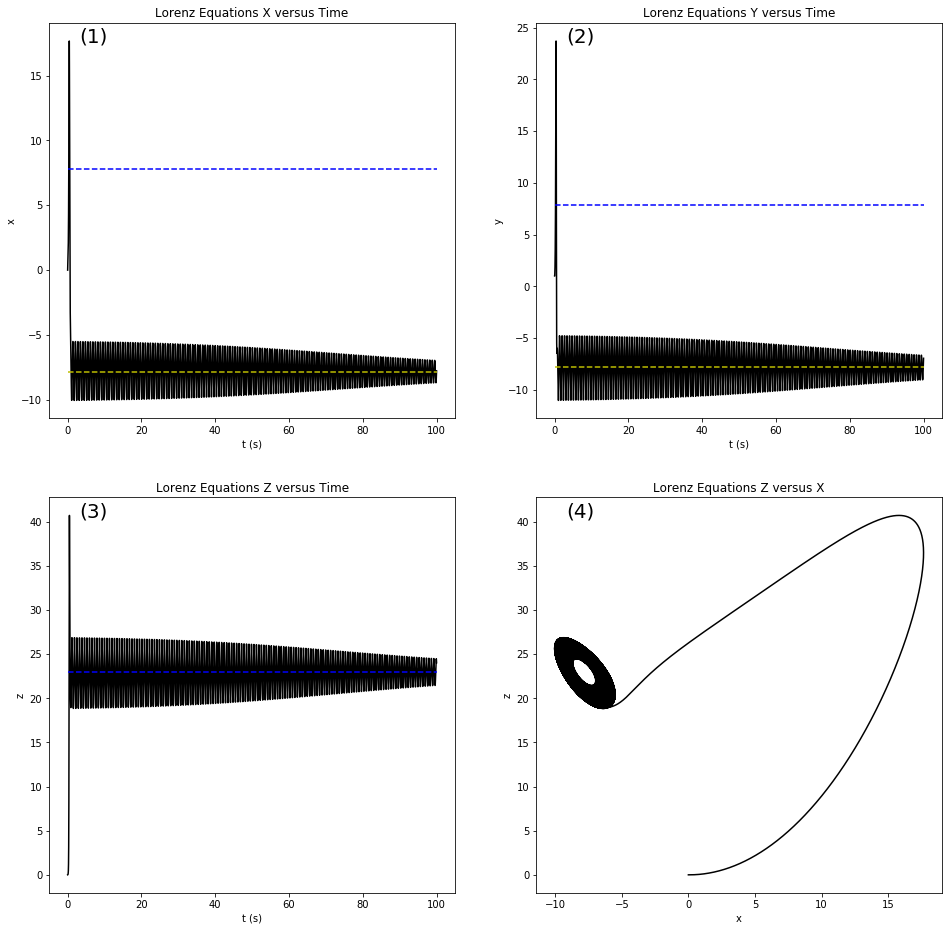

In [4]:
if __name__ == "__main__":
    #set figure size
    plt.figure(figsize=(16, 16))
    
    #set constants and starting condition
    sigma = 10.0
    rho = 24.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0.0, 1.0, 0.0)
    
    #set solution interval and accuracy
    interval = (0.0, 100.0)
    steps = 2000000
    
    #plot Lorenz solution
    lz.lorenzPlot (r0, state, interval, steps, bCrit = True)
    
    plt.show ()

**Figure 8**

*
This figure shows the solution to the Lorenz equations where $\sigma$ = 10, $\beta$ = 8/3, and $\rho$ = 24, and the starting conditions are x = z = 0 and y = 1. There are four subplots; subplots (1), (2), and (3) graph the values of x, y, and z, respectively, versus time. For each of the first three subplots the time-axis ranges from 0 to 100 seconds. In subplot (1) the x-axis ranges from -10 to 15. In subplot (2) the y-axis ranges from -10 to 25. In subplot (3) the z-axis ranges from 0 to 40. The functions in the first three subplots all oscillate rapidly with a decreasing amplitude over time. In both subplots (1) and (2) the lines oscillate around the negative critical value, which is around -7.832 and shown by the dashed-yellow line. The positive critical value is shown by a dashed-blue line at 7.832. In subplot (3) the z-value oscillates around the critical value of 23, which is shown by a dash-blue line. In the fourth subplot the x-axis ranges from -10 to 15 and the z-axis ranges from 0 to 40. The z-x-value arches from (0,0) to the top right corner of the figure back to (-7.832, 23). Near (-7.832, 23) a disk with a hollowed centre is formed.
*

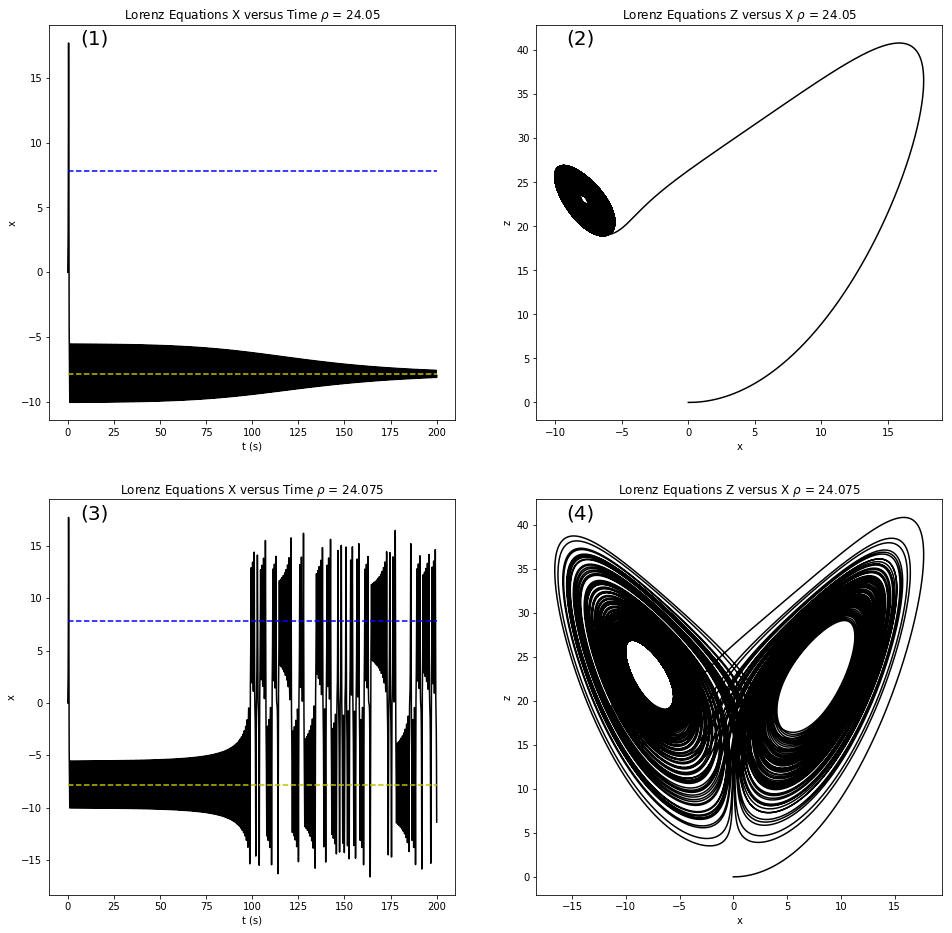

In [47]:
if __name__ == "__main__":  
    #set constants and starting condition
    sigma = 10.0
    rho = [24.05, 24.075]
    beta = 8.0 / 3.0
    r0 = (0.0, 1.0, 0.0)
    
    
    #set plot values
    #set figure size
    plt.figure(figsize=(16, 16))
    
    #additional title clarification
    addTitle = r"$\rho$ = {}"
    
    #plot only x v t and z v x
    bPlots = [True, False, False, True]
    numPlots = 2 # number that are true

    #have a 2 x 2 subplot figure
    plotDim = (2, 2)
    
    #init to 1
    startPlot = 1
    
    #set solution interval and accuracy
    interval = (0.0, 200.0)
    steps = 1000000
    breaks = 4
    
    #plot solutions
    for i in range (len (rho)):
        #set current state
        state = (sigma, rho[i], beta)
        
        #set title values for current rho value
        titles = []
        for j in range (numPlots):
            titles.append (addTitle.format (rho[i]))

        #plot Lorenz solution for first rho
        lz.lorenzPlot (r0, state, interval, steps, bPlots = bPlots, plotDim = plotDim, 
                       startPlot = startPlot, titles = titles, bCrit = True, breaks = breaks)
        
        startPlot += numPlots
  
    plt.plot ()

**Figure 9**

*
This figure shows the solution to the Lorenz equations where $\sigma$ = 10, $\beta$ = 8/3, and the starting conditions are x = z = 0 and y = 1. Subplots (1) and (2) are for $\rho$ = 24.05 and subplots (3) and (4) are for $\rho$ = 24.075. Subplot (1) graphs x versus time. The x-axis ranges from -10 to 15, and the time-axis ranges from 0 to 200 seconds. The x-values oscillate around x = -7.84. The oscillation decreases in magnitude with an increase in time. The dashed-blue line is x = 7.84, and the dashed-yellow line is x = -7.84. Subplot (2) plots z versus x. The z-axis ranges from 0 to 40, and the x-axis ranges from -10 to 15. The z-x-values start at (0,0), arch to the upper right quadrant, and then form a disk at (-7.84, 23.05). Subplot (3) graphs x versus time. The x-axis ranges from -15 to 15, and the time-axis ranges from 0 to 200 seconds. The x-values begin by oscillating around x = -7.84 with an increasing magnitude over time. By 100 seconds the x-values change between oscillating around x = -7.84 and x = 7.84. The dashed-blue line is x = 7.84, and the dashed-yellow line is x = -7.84. Subplot (4) graphs z versus x. The z-axis ranges from 0 to 40, and the x-axis ranges from -15 to 15. The z-x-values form spirals around the two points (-7.84, 23.075) and (7.84, 23.075).
*


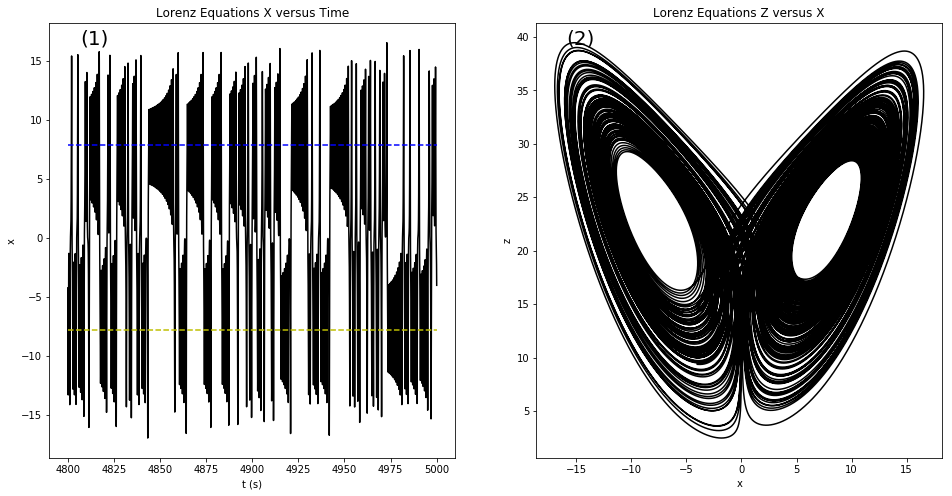

In [9]:
if __name__ == "__main__":
    #set constants and starting condition
    sigma = 10.0
    rho = 24.075
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0.0, 1.0, 0.0)
    
    #number of times break up the interval
    breaks = 40
    
    #set solution interval and accuracy
    a = 0.0
    b = 5000.0
    interval = (a, b)
    plotInterval = (4800, b)
    steps = 1000000
    
    #set up plot shape and size
    fig =  plt.figure(figsize=(16, 8))
    plotDim = (1, 2)
    
    #specify only plot x v t and z v x
    bPlots = [True, False, False, True]
    
    #plot the figure
    lz.lorenzPlot (r0, state, interval, steps, bPlots = bPlots, breaks = breaks, 
                   plotDim = plotDim, plotInterval = plotInterval, bCrit = True)
    plt.show()

**Figure 10**

*
This figure shows the solution to the Lorenz equations where $\sigma$ = 10, $\beta$ = 8/3, and $\rho$ = 24.075 and the starting conditions are x = z = 0 and y = 1. Subplot (1) graphs x versus time. The x-axis ranges from -15 to 15, and the time-axis ranges from 4800 to 5000 seconds. The x-values oscillate around x = 7.84 and -7.84, alternating between the two. The dashed-blue line is x = 7.84, and the dashed-yellow line is x = -7.84. Subplot (2) graphs z versus x.  The z-axis ranges from 0 to 40, and the x-axis ranges from -15 to 15. The z-x-values form spirals around the two points (-7.84, 23.075) and (7.84, 23.075).
*

## Analysis <a id='an'></a>

*Figure 1* shows the angular displacement of three pendulums allowed to evolve for 50 seconds. For $F_d$ = 0 N/kg the pendulum comes to rest within a few oscillations because the frictional force removing energy from the system. When $F_d$ is 0.5 N/kg the pendulum maintains a constant maximum angle of displacement. Both of these cases are periodic. When $F_d$ = 1.2 N/kg the driving force is large enough to cause the pendulum to swing in a full circle. The seemingly discontinuous points on the graph are the result of adding or subtracting $2\pi$ to the angle of the pendulum in order to keep the range between $-\pi$ and $\pi$. 

The simplicity of the 0 N/kg case helps to verify the that my equations and Runge-Kutta method are correct. When $F_d$ = 0 the pendulum oscillates with a decrease in the maximum angle of displacement, which is exactly what I would expect from a damped oscillator. As the pendulum swings, a frictional force provides a resistance to the pendulum's motion. This decreases the pendulum's overall energy and eventually causes it to stop moving all together. These figures are also verified by Giordano, who modeled the same situation using a modified version of the Euler method. 

The motion for $F_d$ = 1.2 N/kg is far different from the other two pendula trajectories. The first two driving forces have fairly simple motion, one oscillates with a decreasing amplitude and the other oscillates with a constant amplitude. For the larger driving force, the pendulum's motion does not display oscillatory motion. *Figure 2* shows that this is not a result of the fact I corrected the pendulum's angle nor the time limit. This case is an example of deterministic chaos because I can determine the angle at any time given initial parameters, but the motion is unpredictable because it is not periodic or oscillatory.



A motion is predictable if given the starting conditions of one of the pendulums, I could predict the position of the other. *Figure 3* shows the difference in the angle ($\Delta\theta$) of two pendulums started with the initial angles $\theta_0$ = 0.2 and 0.201 radians. In subplot 1 the driving coefficient is 0.5 N/kg. For this low driving force case $\Delta\theta$ decreases over time to $10^{-16}$ radians, which is the precision limit of the data type used. As a result of $\Delta\theta$ converging to zero, the two pendulums must be converging to having the same state of motion at the same time. Given one of these pendulums, I could predict the other pendulum's motion.

A motion is unpredictable if even with a complete solution to one of the pendulum's motion I would be unable to predict the other pendulum's motion. *Figure 3* subplot 2 shows the case for the driving coefficient of 1.2 N/kg. The difference in the angle between the two pendulum increases with time. As seen in the plot, the angle difference increased rapidly for a small amount of time and levels off near $2\pi$ (because this is the maximum $\Delta\theta$ possible). Despite these pendulums being started at similar states, their behaviours diverge rapidly.

The dashed lines in each plot in *figure 3* corresponds to the trend of the peak values of $\Delta\theta$. This trend is approximately $\log (\Delta\theta) \approx \lambda t$. Solving this for $\Delta\theta$ gives the relation $\Delta\theta \approx e^{\lambda t}$, where $\lambda$ is the Lyapunov exponent [2]. As seen in *figure 3*, $\lambda$ was negative when $\Delta\theta$ converged while $\lambda$ was positive when $\Delta\theta$ diverged. This is because $\Delta\theta$ converged for a nonchaotic system, and $\Delta\theta$ did not converged for a chaotic system.



*Figure 4* shows how sensitive chaotic systems can be to small approximations. This figure shows several solutions to the pendulum problem where the step size is varied. For small time values the variation in the angular displacement is not significant, but by 200 seconds the angles are completely different for all four lines. 
This graph does not constrict the angle to be between $-\pi$ and $\pi$ to emphasis that the path taken by the pendula in all four cases is different overall.

This figure also helps to show the limitations of the Runge-Kutta method. Even with 1 million steps (or 1,667 steps per second) I was only able to obtain about 190 seconds of data that overlapped with 10 million steps. Due to the chaotic nature of this problem, and the lack of an analytical solution to equation 1 [2], I had a difficult time checking the validity of the solution. 


*Figure 5* shows the solution to the Lorenz equation first studied by Lorenz [2,3,4,5]. This is a chaotic solution because $\rho$ > 24.74. The x and y values oscillate around both of the critical values because this is a chaotic solution [4,5]. 

*Figure 7* shows the difference between solutions that are nonchaotic and chaotic. In each of the nonchaotic solutions (subplots 1, 2, and 3), there is only one attractor. For the chaotic solution (subplot 4) there are two attractors. The $\rho$ values of 20, 22, and 24 are nonchaotic because they are less than 24.74. The $\rho$ = 25 case is chaotic because $\rho$ > 24.74.

*Figure 8* shows that in nonchaotic solutions, x and y only oscillate around one of the critical values. This makes sense since there is only one attractor and the x and y values remain near that attractor. This is a pre-chaotic solution (a solution where the values eventually go to a specific attractor [6]). 

*Figure 9* shows a pre-chaotic solution and pre-chaotic solution with chaos [6]. $\rho$ = 24.05 is pre-chaotic, so the x and y values oscillate around the critical values. $\rho$ = 24.075 is pre-chaotic, with $\rho$ < 24.74, but there is a third attractor that is a chaotic attractor [6]. Despite $\rho$ < 24.74, this solution has a chaotic element. The x and y values for $\rho$ = 24.075 oscillate around both critical points like a chaotic solution [6]. *Figure 10* shows $\rho$ = 25.075 continues to oscillate between the two critical points for x and y of -7.84 and 7.84 after an extended period of time.



## Summary <a id='sum'></a>

### Scientific Summary

I showed and explained the occurance of deterministic chaos in the pendulum modeled by equation 1 and the Lorenz equations (equation 2). I began by examining the periodic nature in chaotic and the lack of periodicity in nonchaotic solutions to the pendulum model. I then compared the difference in oscilations around critical points for chaotic and nonchaotic solutions to the Lorenz equations. I finished by showing the chaotic nature in pre-chaotic solutions.

### Personal Summary

I enjoyed learning about Chaos theory, a branch of mathematics I knew nothing about. I was also able to work on my writing skills. Although most of the parameters I used are the same, I spent a great deal of time varying them, a skill I wanted to work on. Most of the resulting figures were not interesting, but I learned about pre-chaotic solutions because of this.

## References <a id='refs'></a>

[1] **Computational Physics** Mark Newman - Createspace - 2013

[2] [Giordano, Nicholas J. Computational Physics. Prentice Hall, 1997.](./Sources/Giordano.pdf)  

[3] [Muthuramalingam, Rasi. (2013). ANALYTICAL SOLUTION OF LORENZ EQUATION USING HOMOTOPY ANALYSIS METHOD. 
Journal of Global Research in Mathematical Archives. 1. 14. 
https://www.researchgate.net/publication/273641652_ANALYTICAL_SOLUTION_OF_LORENZ_EQUATION_USING_HOMOTOPY_ANALYSIS_METHOD](./Sources/Analytical_Solution_of_Lorenz_Equations.pdf)  

[4] [Weisstein, Eric W. "Lorenz Attractor." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/LorenzAttractor.html](http://mathworld.wolfram.com/LorenzAttractor.html)  

[5] [Taylor, Robert L. V. “Attractors: Nonstrange to Chaotic.” Society for Industrial and Applied Mathematics, www.siam.org/students/siuro/vol4/S01079.pdf.](./Sources/Attractors_Nonstrange_to_Chaotic.pdf)  

[6] [Clark, Alfred. "The Lorenz Equations." Dynamical Systems, University of Rochester. Course handout. http://www2.me.rochester.edu/courses/ME406/webexamp5/loreq.pdf](./Sources/The_Lorenz_Equations.pdf)

[7] [“Attractor.” Dictionary.com, Dictionary.com, www.dictionary.com/browse/attractor.](http://www.dictionary.com/browse/attractor)


### [Back to top](#TableOfContents)